In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
df=pd.read_csv(r"/content/drive/MyDrive/Solar Power Plant Data.csv")
df

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0
...,...,...,...,...,...,...,...,...
8755,31.12.2017-19:00,4.1,0,988.2,-4.8,-0.7,94,0.0
8756,31.12.2017-20:00,2.1,0,987.3,-5.0,-0.3,95,0.0
8757,31.12.2017-21:00,1.8,0,986.7,-5.3,0.2,93,0.0
8758,31.12.2017-22:00,2.2,0,986.0,-5.4,0.3,92,0.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


In [63]:
df.describe()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2.639823,11.180479,1010.361781,97.538493,6.978893,76.719406,684.746071
std,1.628754,21.171295,12.793971,182.336029,7.604266,19.278996,1487.454665
min,0.000000,0.000000,965.900000,-9.300000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-6.200000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-1.400000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.600000,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700000,27.100000,100.000000,7701.000000


In [64]:
df.isnull().sum()

,0
Date-Hour(NMT),0
WindSpeed,0
Sunshine,0
AirPressure,0
Radiation,0
AirTemperature,0
RelativeAirHumidity,0
SystemProduction,0


In [65]:
# Convert Date-Hour to datetime format
df['Date-Hour(NMT)'] = pd.to_datetime(df['Date-Hour(NMT)'], format='%d.%m.%Y-%H:%M')
df

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,2017-01-01 00:00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,2017-01-01 01:00:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,2017-01-01 02:00:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,2017-01-01 03:00:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,2017-01-01 04:00:00,4.0,0,1003.1,-6.3,3.6,67,0.0
...,...,...,...,...,...,...,...,...
8755,2017-12-31 19:00:00,4.1,0,988.2,-4.8,-0.7,94,0.0
8756,2017-12-31 20:00:00,2.1,0,987.3,-5.0,-0.3,95,0.0
8757,2017-12-31 21:00:00,1.8,0,986.7,-5.3,0.2,93,0.0
8758,2017-12-31 22:00:00,2.2,0,986.0,-5.4,0.3,92,0.0


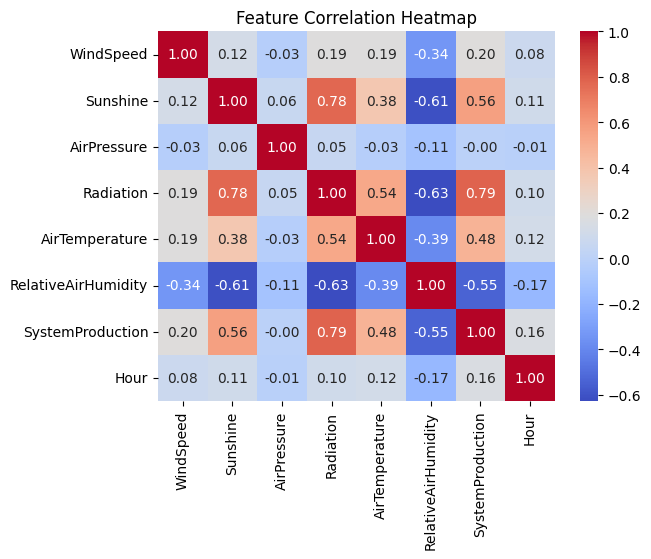

In [66]:
# Convert Date-Hour to datetime format if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['Date-Hour(NMT)']):
    df['Date-Hour(NMT)'] = pd.to_datetime(df['Date-Hour(NMT)'], format='%d.%m.%Y-%H:%M', errors='coerce')

# Convert 'Date-Hour(NMT)' to numeric representation before calculating correlation.
# Here, we extract the hour of the day as a numeric feature.
df['Hour'] = df['Date-Hour(NMT)'].dt.hour

# Now, calculate the correlation matrix excluding the original 'Date-Hour(NMT)' column
sns.heatmap(df.drop(columns=['Date-Hour(NMT)']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

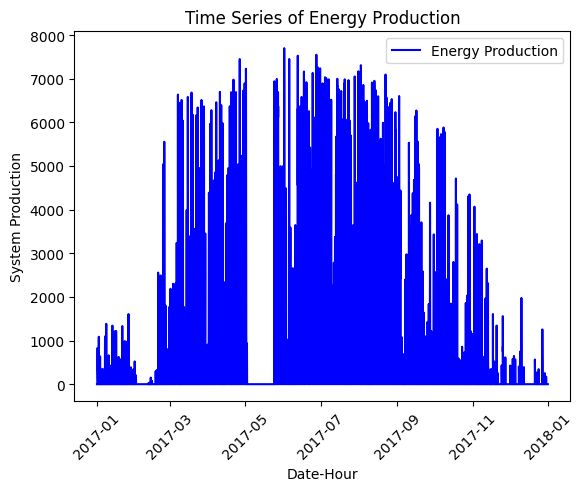

In [67]:
plt.plot(df['Date-Hour(NMT)'], df['SystemProduction'], label='Energy Production', color='blue')
plt.xlabel("Date-Hour")
plt.ylabel("System Production")
plt.title("Time Series of Energy Production")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [68]:
df['Date-Hour(NMT)'] = pd.to_datetime(df['Date-Hour(NMT)'])

# Extract time-based features
df['Hour'] = df['Date-Hour(NMT)'].dt.hour
df['DayOfWeek'] = df['Date-Hour(NMT)'].dt.dayofweek
df['Month'] = df['Date-Hour(NMT)'].dt.month
df['DayOfYear'] = df['Date-Hour(NMT)'].dt.dayofyear  # Optional

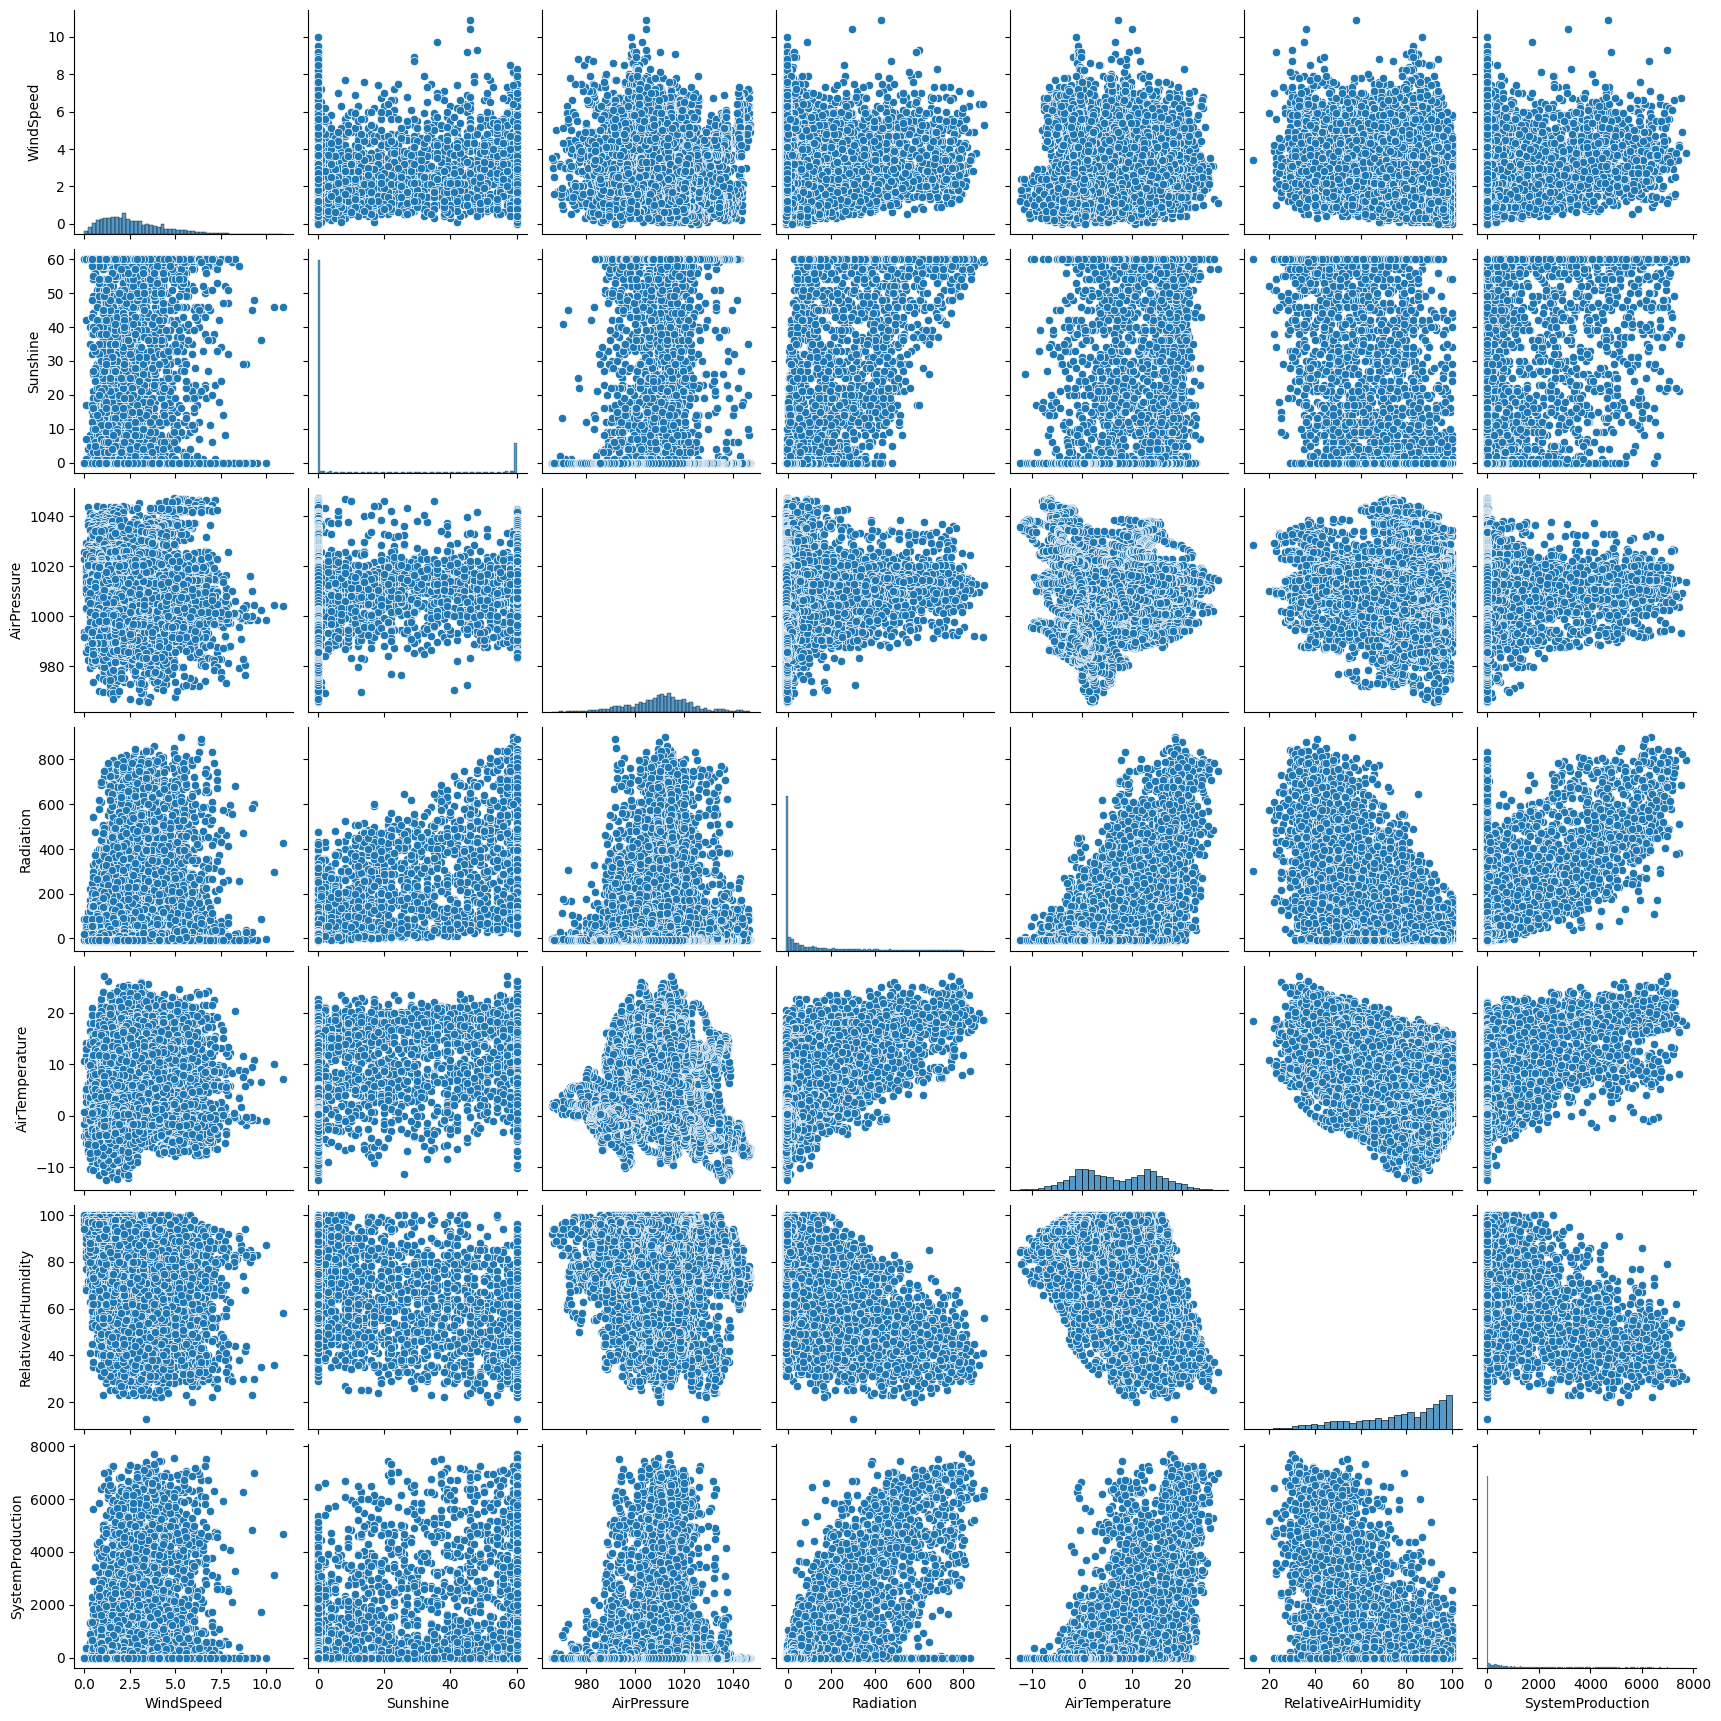

In [69]:
sns.pairplot(df, vars=['WindSpeed', 'Sunshine', 'AirPressure', 'Radiation', 'AirTemperature', 'RelativeAirHumidity', 'SystemProduction'])
plt.show()

In [70]:
df

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Hour,DayOfWeek,Month,DayOfYear
0,2017-01-01 00:00:00,0.6,0,1003.8,-7.4,0.1,97,0.0,0,6,1,1
1,2017-01-01 01:00:00,1.7,0,1003.5,-7.4,-0.2,98,0.0,1,6,1,1
2,2017-01-01 02:00:00,0.6,0,1003.4,-6.7,-1.2,99,0.0,2,6,1,1
3,2017-01-01 03:00:00,2.4,0,1003.3,-7.2,-1.3,99,0.0,3,6,1,1
4,2017-01-01 04:00:00,4.0,0,1003.1,-6.3,3.6,67,0.0,4,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2017-12-31 19:00:00,4.1,0,988.2,-4.8,-0.7,94,0.0,19,6,12,365
8756,2017-12-31 20:00:00,2.1,0,987.3,-5.0,-0.3,95,0.0,20,6,12,365
8757,2017-12-31 21:00:00,1.8,0,986.7,-5.3,0.2,93,0.0,21,6,12,365
8758,2017-12-31 22:00:00,2.2,0,986.0,-5.4,0.3,92,0.0,22,6,12,365


In [71]:
X = df.drop(columns=['SystemProduction', 'Date-Hour(NMT)'])
y = df['SystemProduction']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [73]:
X_train

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,Hour,DayOfWeek,Month,DayOfYear
0,0.6,0,1003.8,-7.4,0.1,97,0,6,1,1
1,1.7,0,1003.5,-7.4,-0.2,98,1,6,1,1
2,0.6,0,1003.4,-6.7,-1.2,99,2,6,1,1
3,2.4,0,1003.3,-7.2,-1.3,99,3,6,1,1
4,4.0,0,1003.1,-6.3,3.6,67,4,6,1,1
...,...,...,...,...,...,...,...,...,...,...
7003,3.5,0,1019.9,-6.3,6.2,73,19,3,10,292
7004,2.5,0,1019.9,-6.4,6.6,72,20,3,10,292
7005,2.0,0,1020.0,-6.3,6.6,72,21,3,10,292
7006,2.6,0,1019.9,-6.2,6.4,75,22,3,10,292


In [ ]:
# Train XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation Metrics to accessaccuracy and predictive power
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 92.96432009177032
Mean Squared Error (MSE): 68024.48681166187
Root Mean Squared Error (RMSE): 260.8150433001553
R-squared (R2): 0.2943817485867237


In [50]:
joblib.dump(xgb_model, "xgb_model.pkl")

['xgb_model.pkl']

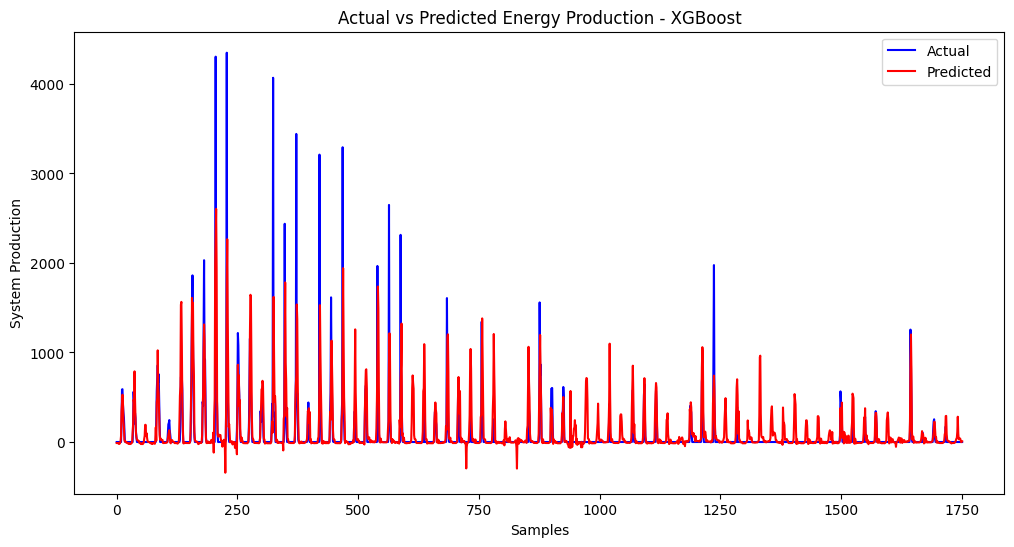

In [51]:

# Visualizing Predictions
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", color='blue')
plt.plot(y_pred, label="Predicted", color='red')
plt.xlabel("Samples")
plt.ylabel("System Production")
plt.title("Actual vs Predicted Energy Production - XGBoost")
plt.legend()
plt.show()


In [52]:
# Convert categorical features to numeric (if any exist)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Ensure target variable is numeric
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# Check for NaN values after conversion
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)


In [53]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize LightGBM model
lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
lgb_model.fit(X_train, y_train)

# Predictions
y_pred = lgb_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1287
[LightGBM] [Info] Number of data points in the train set: 7008, number of used features: 10
[LightGBM] [Info] Start training from score 837.185002
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [54]:
joblib.dump(lgb_model, "lgbm_model.pkl")

['lgbm_model.pkl']

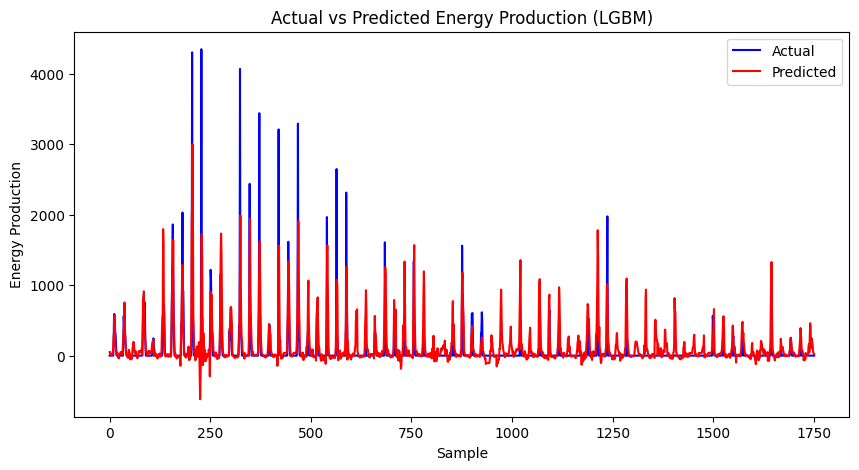

In [55]:
# Plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", color='blue')
plt.plot(y_pred, label="Predicted", color='red')
plt.xlabel("Sample")
plt.ylabel("Energy Production")
plt.title("Actual vs Predicted Energy Production (LGBM)")
plt.legend()
plt.show()

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the ANN model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    Dense(32, activation='relu'),  # Hidden Layer 1
    Dense(16, activation='relu'),  # Hidden Layer 2
    Dense(1, activation='linear')  # Output Layer (Regression Task)
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = ann_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3300478.5000 - mae: 875.9702 - val_loss: 475194.7812 - val_mae: 669.0259
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1487853.8750 - mae: 775.7447 - val_loss: 117444.1016 - val_mae: 239.6991
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1080846.0000 - mae: 549.6167 - val_loss: 66957.8516 - val_mae: 120.3389
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 969251.1875 - mae: 531.3130 - val_loss: 67834.5234 - val_mae: 118.0621
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 982827.0000 - mae: 524.5128 - val_loss: 139020.1094 - val_mae: 289.7524
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 921915.1250 - mae: 512.7211 - val_loss: 91723.9375 - val_mae: 193.4545
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 973673.0625 - mae: 519.5034 - val_loss: 82073.4922 - val_mae: 181.8324
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1004200.3750 - mae: 5

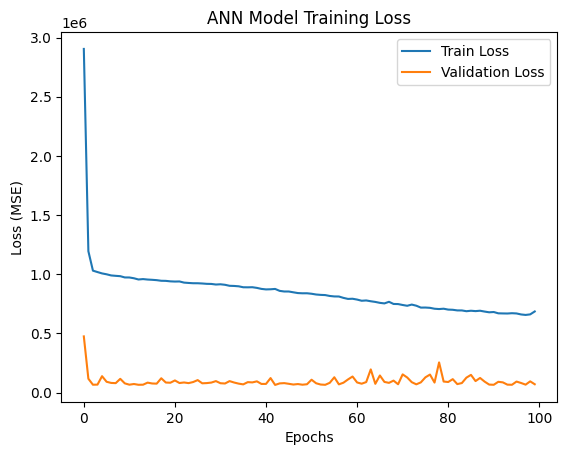

In [57]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("ANN Model Training Loss")
plt.show()

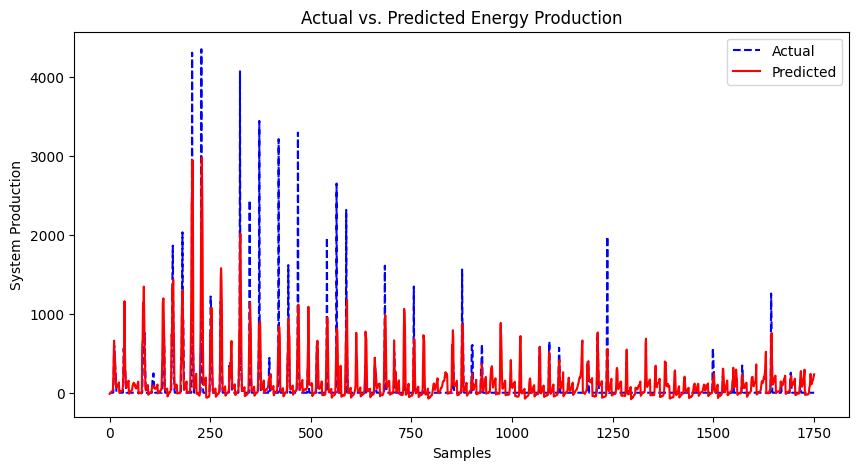

In [58]:

import matplotlib.pyplot as plt

# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", color="blue", linestyle="dashed")
plt.plot(y_pred, label="Predicted", color="red")

plt.xlabel("Samples")
plt.ylabel("System Production")
plt.title("Actual vs. Predicted Energy Production")
plt.legend()
plt.show()


In [59]:
import joblib

# Save the trained ANN model
joblib.dump(ann_model, "ann_model.pkl")
print("ANN model saved successfully!")

ANN model saved successfully!
